In [1]:
#import necessary modules
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# loading dataset
X = np.load("train_data.npy")
y = np.load("train_labels.npy")


# Scaling data values                          
X = np.divide(X, 255)

# Setting one specific digit as the target for one perceptron
# In this try we consider digit=8 as the target for the perceptron learning algorithm
i = 8
y[y != i] = 0
np.place(y, y == i, [1])

In [3]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [4]:
def perceptron(X, y, lr, epochs, IsCalConf):
    
    # X : Inputs.
    # y : labels/target.
    # lr : learning rate.
    # epochs : Number of iterations.
    
    # m: number of training examples
    # n: number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    y_hat_total =  np.zeros(len(y))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    acc_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified #accuracy
        n_miss = 0
        acc = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            
            if IsCalConf == True:
                if epoch == epochs-1:
                    y_hat_total[idx] = y_hat;
            
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
          
        # Appending number of misclassified examples and accuracy
        # at every iteration.
        n_miss_list.append(n_miss)
        acc_list.append(1 - (n_miss)/m )
    return theta, n_miss_list,  acc_list, epochs, y_hat_total

In [5]:
# Fitting the model
epochs = 50
lr = 0.1
theta, miss, acc, epochs, y_hat_total = perceptron(X, y, lr, epochs, False)

In [6]:
# Returning accuracy on training dataset at each epoch
print(acc)

[0.9045333333333333, 0.9238666666666666, 0.9242666666666667, 0.9321333333333334, 0.9328, 0.9358666666666666, 0.9366666666666666, 0.9332, 0.9389333333333333, 0.9370666666666667, 0.9410666666666667, 0.9382666666666667, 0.9390666666666667, 0.9414666666666667, 0.9384, 0.9441333333333334, 0.9453333333333334, 0.9405333333333333, 0.9413333333333334, 0.9404, 0.9405333333333333, 0.9413333333333334, 0.9429333333333333, 0.9424, 0.9436, 0.9433333333333334, 0.9444, 0.9462666666666667, 0.9444, 0.9413333333333334, 0.9448, 0.946, 0.9433333333333334, 0.9432, 0.9441333333333334, 0.9417333333333333, 0.9444, 0.9450666666666667, 0.9441333333333334, 0.9445333333333333, 0.9466666666666667, 0.9465333333333333, 0.9429333333333333, 0.9428, 0.9466666666666667, 0.9448, 0.9469333333333333, 0.9465333333333333, 0.9441333333333334, 0.9446666666666667]


Text(0.5, 1.0, 'training phase')

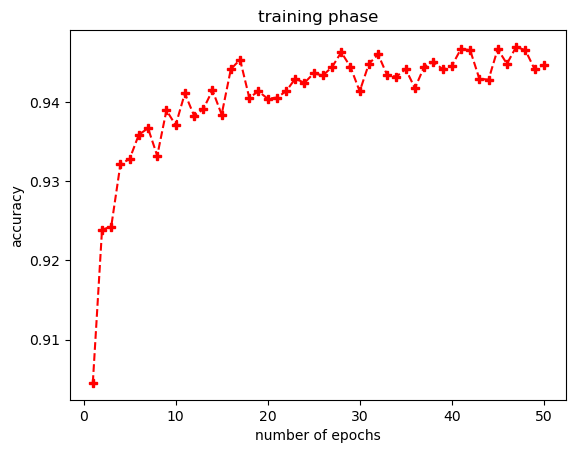

In [7]:
#plotting accuracy at each epoch in training phase
epoc = np.array(range(1, epochs+1))
plt.plot(epoc, acc, 'r--P')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('training phase')

In [8]:
# Loading test dataset
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

                         
X2 = np.divide(test_data, 255)

y2 = test_labels

y2[y2 != i] = 0
np.place(y2, y2 == i, [1])

In [9]:
# Testing the model
theta, miss, acc, epochs, y_hat_total = perceptron(X2, y2, lr, epochs, True)

In [10]:
# Creating confusion matrix on test set
y_actu = pd.Series(y2, name='Actual')
y_pred = pd.Series(y_hat_total, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  0.0  1.0   All
Actual                   
0          891    9   900
1            8   92   100
All        899  101  1000


In [11]:
# Returning accuracy at each epoch
print(acc)

[0.881, 0.924, 0.925, 0.9410000000000001, 0.946, 0.938, 0.963, 0.956, 0.96, 0.966, 0.962, 0.966, 0.966, 0.971, 0.97, 0.967, 0.971, 0.975, 0.976, 0.976, 0.981, 0.978, 0.988, 0.978, 0.989, 0.972, 0.978, 0.98, 0.983, 0.978, 0.981, 0.99, 0.986, 0.981, 0.989, 0.99, 0.985, 0.992, 0.991, 0.989, 0.991, 0.986, 0.981, 0.991, 0.994, 0.988, 0.994, 0.992, 0.985, 0.983]


Text(0.5, 1.0, 'testing phase')

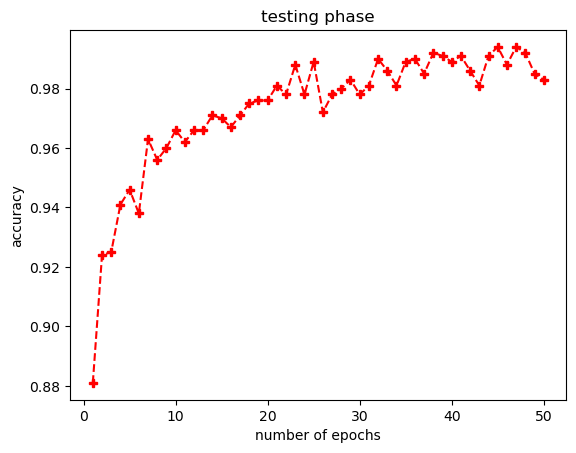

In [12]:
#plotting accuracy at each epoch in testing phase
epoc = np.array(range(1, epochs+1))
plt.plot(epoc, acc, 'r--P')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('testing phase')